**importing necessary modules**

In [ ]:
import numpy as np
import pandas as pd

# nltk provides various tools and resources for natural language processing and text analysis.
import nltk
# This imports the PorterStemmer class, which is used for word stemming. Stemming is the process of reducing words to their root or base form, which can be useful for text analysis and text processing.
from nltk.stem.porter import PorterStemmer
# This imports the TweetTokenizer class, which is specifically designed for tokenizing (splitting) text from Twitter, taking into account Twitter-specific conventions and entities (e.g., hashtags, mentions).
from nltk.tokenize import TweetTokenizer
# This imports the word_tokenize function, which is a more general-purpose tokenizer used to split text into words.
from nltk.tokenize import word_tokenize
# this imports the stopwords dataset from NLTK. Stopwords are common words (e.g., "the," "and," "in") that are often removed from text data during text preprocessing because they don't carry significant meaning in many NLP tasks.
from nltk.corpus import stopwords
nltk.download('stopwords')

#re for regular expression manipulation
import re


# This imports the TensorFlow library itself, providing a foundation for building machine learning and deep learning models.
import tensorflow as tf
# This imports the Tokenizer class from TensorFlow's Keras API. The Tokenizer class is used for text tokenization, allowing you to convert text data into sequences of integers.
from tensorflow.keras.preprocessing.text import Tokenizer

# This imports the pad_sequences function from TensorFlow's Keras API. pad_sequences is used to ensure that sequences of data (e.g., text sequences) have the same length by adding padding or truncating as necessary.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# This imports the Layers module from TensorFlow's Keras API. This module contains a wide range of layer types that can be used to construct neural networks, including recurrent layers, convolutional layers, and dense layers.
import tensorflow.keras.layers as Layers
# This imports the SparseCategoricalCrossentropy loss function from TensorFlow's Keras API. This loss function is often used in classification tasks where the target values are integers representing class labels.
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# This imports the Adam optimizer, which is a popular optimization algorithm used for training neural network models. It's commonly used in conjunction with the compile method when defining the training process for a model.
from tensorflow.keras.optimizers import Adam

# This import allows you to use the train_test_split function, which is commonly used to split your data into training and testing sets. This is essential for evaluating the performance of machine learning models.
from sklearn.model_selection import train_test_split
# The confusion_matrix function is used to compute a confusion matrix, which is a tabular representation of the performance of a classification algorithm. It helps you understand how many true positives, true negatives, false positives, and false negatives your model produced.
from sklearn.metrics import confusion_matrix
# The classification_report function generates a text report that provides various metrics for evaluating the performance of a classification model. It includes metrics like precision, recall, F1-score, and support for each class.
from sklearn.metrics import classification_report

# module for data visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**reading our data**

In [ ]:
data=pd.read_csv('train.csv')
data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [ ]:
#visualization

fig = px.bar(data.Label.value_counts(), x=['Politics','Sports'], y='Label',color=['Politics','Sports'])
fig.update_layout(width=400, height=400)
fig.show()

**Data preprocessing**

In [ ]:
y=data['Label'].copy()

In [ ]:
#lets take a look in our tweets
data.TweetText.sample(10)

6263    '@EchoOfIndia arre ji. We can start one of our...
3436    Sangakkara on losing World Cup finals: \u2018Y...
87      Thought Mumbai's peak hour traffic was bad but...
4079    'Today, we launched an opportunity to take our...
6483    'IN 60 MINS: Watch #SecKerry deliver his 1st p...
4842    'With more spending and more debt, @BarackObam...
3789    'If anyone is in Sydney ahead of the ODI tomor...
5212    'Is this the first time ever FOUR wicketkeeper...
3275    'Freezing &amp; confiscating proceeds of crime...
513     'RT @pranaynigotiya: @milinddeora Sydenham col...
Name: TweetText, dtype: object

In [ ]:
data.TweetText[6]

"FACT: More than 800,000 defense employees will be forced to take unpaid leave if Congress doesn't stop impending spending cuts. #JobsNotCuts"

In [ ]:
#this function for cleaning our tweets
def cleaner(tweet):

    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)

    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)

    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)

    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)

    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)

    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])

    return  tweet

In [ ]:
stop_words = stopwords.words('english')
#this will make all tweets written in lower case
data['TweetText']=data['TweetText'].apply(lambda x:x.lower())

data['TweetText'] = data['TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#applying our cleaner method on all tweets
data['TweetText']  = data['TweetText'].apply(cleaner)


In [ ]:
data.TweetText.sample(12)

2606    'tubby smith team wisconsin last night (via ) ...
5724                        'bird short punished marsh. '
4794    laxman check ago. meet him. must dismayed anxi...
5342                                    : tennis racket!?
3177    ' : first president , proposed contain slavery...
993     'video english: press conference chief cabinet...
4417    'through wars, command sergeant major basil pl...
4844    ' budget: select trains passengers contact on-...
1858    container terminal atlantic side panama canal....
105     'one-handed stunner stahelkar seal world austr...
4291    proud voice stand oppose violence women &amp; ...
3820    shitty watto out, that. ponting crowd! lyon re...
Name: TweetText, dtype: object

In [ ]:
# this for tokenizing all tweets in the dataset
cleaned_data=data['TweetText']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_data)
X = tokenizer.texts_to_sequences(cleaned_data)




print("Sentence:\n{}".format(cleaned_data[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Sentence:
fact: , defense employees forced take unpaid leave congress stop impending spending cuts.

After tokenizing :
[490, 700, 1860, 2785, 37, 5369, 928, 107, 400, 3661, 491, 191]

After padding :
[ 490  700 1860 2785   37 5369  928  107  400 3661  491  191    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
y

0       Politics
1       Politics
2         Sports
3         Sports
4         Sports
          ...   
6520    Politics
6521      Sports
6522      Sports
6523      Sports
6524    Politics
Name: Label, Length: 6525, dtype: object

In [ ]:
encoding = {'Politics': 0,
            'Sports': 1,
           }
labels = ['Politics', 'Sports']

y.replace(encoding, inplace=True)
y

0       0
1       0
2       1
3       1
4       1
       ..
6520    0
6521    1
6522    1
6523    1
6524    0
Name: Label, Length: 6525, dtype: int64

In [ ]:
#spliting our datase into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


# hyper parameters
#The number of training epochs (iterations) the model should go through
EPOCHS = 2
#The batch size for training. It determines how many samples are used in each forward and backward pass during training.
BATCH_SIZE = 32
#dimension of the embedding vectors,
embedding_dim = 16
units = 256
# the size of the vocabulary
vocab_size = len(tokenizer.word_index)+1
model = tf.keras.Sequential([
    Layers.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]),
    Layers.Bidirectional(Layers.LSTM(units,return_sequences=True)),
    Layers.GlobalMaxPool1D(),
    Layers.Dropout(0.4),
    Layers.Dense(64, activation="relu"),
    Layers.Dropout(0.4),
    Layers.Dense(3)
])


model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 22, 16)            185712    
                                                                 
 bidirectional_1 (Bidirecti  (None, 22, 512)           559104    
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 512)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.12, batch_size=BATCH_SIZE)

Epoch 1/2
144/144 [==============================] - 25s 132ms/step - loss: 0.6087 - accuracy: 0.6471 - val_loss: 0.2716 - val_accuracy: 0.9011
Epoch 2/2
144/144 [==============================] - 20s 137ms/step - loss: 0.1834 - accuracy: 0.9360 - val_loss: 0.2730 - val_accuracy: 0.9091


In [ ]:
fig = px.line(
    history.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}
)

fig.show()

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}
)

fig.show()

In [ ]:
#make prediction using our test data
pred = model.predict(X_test)
class_predictions = pred.argmax(axis=1)
class_predictions

41/41 [==============================] - 2s 32ms/step


array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2443309724330902
Test Accuracy: 0.9088122844696045


array([[568,  70],
       [ 49, 618]])

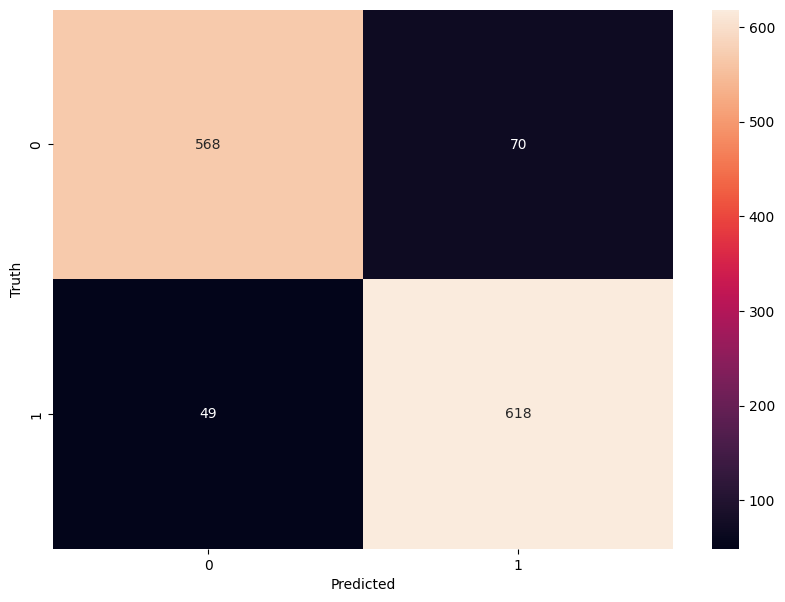

In [ ]:
cm = confusion_matrix(y_test, class_predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

cm

In [ ]:
print(classification_report(y_test, class_predictions, target_names=labels))

              precision    recall  f1-score   support

    Politics       0.92      0.89      0.91       638
      Sports       0.90      0.93      0.91       667

    accuracy                           0.91      1305
   macro avg       0.91      0.91      0.91      1305
weighted avg       0.91      0.91      0.91      1305



**make predictions  using given testing data in order to submit the task**

In [ ]:
#this data set is given in the compitition to test the model in order to submit the prediction
test_data=pd.read_csv('test.csv')
test_data.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [ ]:
#this will make all tweets written in lower case
test_data['TweetText']=test_data['TweetText'].apply(lambda x:x.lower())

test_data['TweetText'] = test_data['TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#applying our cleaner method on all tweets
test_data['TweetText']  = test_data['TweetText'].apply(cleaner)

In [ ]:
# this for tokenizing all tweets in the dataset
cleaned_test_data=test_data['TweetText']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_test_data)
X = tokenizer.texts_to_sequences(cleaned_test_data)




print("Sentence:\n{}".format(cleaned_test_data[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Sentence:
tonight's game send text (start 'kop'), tweet email lfctv .com

After tokenizing :
[240, 13, 189, 562, 83, 2645, 241, 686, 2646, 1630]

After padding :
[ 240   13  189  562   83 2645  241  686 2646 1630    0    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
#make prediction using our test data
pred = model.predict(X)
class_predictions = pred.argmax(axis=1)
class_predictions

82/82 [==============================] - 3s 31ms/step


array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
test_data['Label']=class_predictions
test_data=test_data.drop('TweetText',axis=1)
encoding = {0:'Politics',
            1:'Sports',
           }

test_data.Label.replace(encoding, inplace=True)
test_data.to_csv('submission.csv', index=False)